In [2]:
import pandas as pd
import numpy as np

# Generate a synthetic dataset
np.random.seed(42)

num_students = 200
study_hours = np.random.uniform(0, 40, num_students)  # Hours per week
attendance = np.random.uniform(50, 100, num_students)  # Attendance percentage

# Define pass/fail condition: more study hours and attendance increase the probability of passing
pass_fail = (study_hours * 0.3 + attendance * 0.7 + np.random.normal(0, 5, num_students)) > 60
pass_fail = pass_fail.astype(int)  # Convert boolean to 0/1

# Create DataFrame
student_df = pd.DataFrame({
    "Study Hours": study_hours,
    "Attendance": attendance,
    "Pass": pass_fail
})

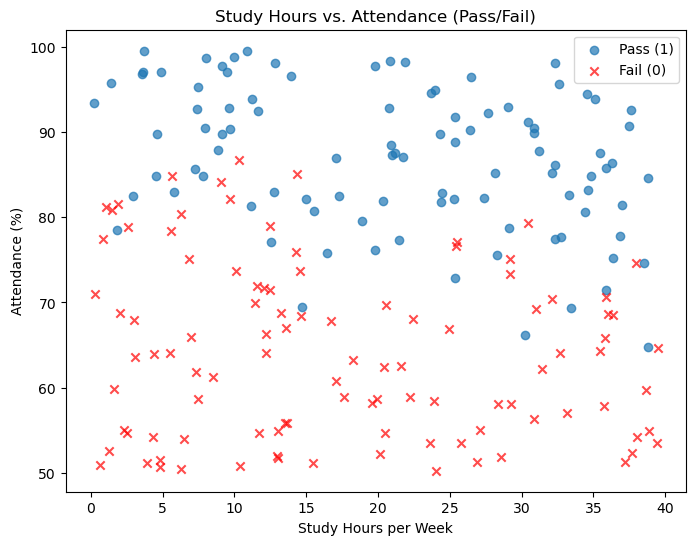

In [3]:
import matplotlib.pyplot as plt

# Scatter plot of Study Hours vs. Attendance, colored by Pass/Fail
plt.figure(figsize=(8,6))
plt.scatter(student_df[student_df["Pass"] == 1]["Study Hours"], 
            student_df[student_df["Pass"] == 1]["Attendance"], 
            label="Pass (1)", alpha=0.7, marker='o')
plt.scatter(student_df[student_df["Pass"] == 0]["Study Hours"], 
            student_df[student_df["Pass"] == 0]["Attendance"], 
            label="Fail (0)", alpha=0.7, marker='x', color='red')

plt.xlabel("Study Hours per Week")
plt.ylabel("Attendance (%)")
plt.title("Study Hours vs. Attendance (Pass/Fail)")
plt.legend()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Define features and target variable
X = student_df[["Study Hours", "Attendance"]]
y = student_df["Pass"]

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix



(0.875,
 array([[16,  3],
        [ 2, 19]], dtype=int64))